Question 1.

- The final classification under the majority vote approach would be 0.4 because the two majority votes are 0.2 and 0.6, and the average of those equals to 0.4.
- The final classification under the average probability approach would be $(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75)/10 = 0.45$.
- The average probablity approach takes into account all of the predictions, meaning that if there was a bootstrapped sample that was very high or low, it could skew the final classification in that direction, whereas the majority vote approach looks at the prediction that is the most common and takes that as the final classification, meaning that most of the time, that classification should be around the most likely to be seen. In this case, the two classifications are not that far apart. 

Question 2.

Bagging is focused on prediction, instead of just confidence on a parameter estimate, so it can take advantage of data that is normally just discarded by other methods in order to evaluate accuracy of each resampled model fit  𝑓̂ 𝑖(𝑥) .

During resampling with replacement, a certain amount of the data is left out. In a bootstrap those values would just be ignored or discarded, but in bagging those values can be used to form an independent test set for evaluating the model fitted to  𝑋∗1. This means that with out of the bag (OOB) error, the hold out test accuracy of all models  𝑓̂ 1(𝑥),...,𝑓̂ 𝐵(𝑥) can be evaluated while generating them.

In [2]:
# Question 3a.
library(ISLR)
library(tidyverse)
library(tree)
library(randomForest)

d <- read.csv(file = "unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- select(d, Subject, Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, 
             WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, 
             Relational_Task_Acc) %>% na.omit()
head(d1)

,Subject,Gender,Age,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol,WM_Task_Acc,ReadEng_Unadj,Language_Task_Acc,Dexterity_Unadj,PosAffect_Unadj,Relational_Task_Acc
,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,100206,M,26-30,130.42,543134,807245,91.596,113.5460,96.875,106.61,48.4,73.750
3,100307,F,26-30,112.56,407292,664124,85.425,111.0700,80.417,118.68,46.2,96.250
4,100408,M,31-35,121.18,500417,726206,91.138,131.8100,97.222,117.48,48.4,80.417
5,100610,M,26-30,126.53,512946,762308,96.867,141.3166,100.000,121.55,55.1,96.667
6,101006,F,31-35,101.85,429449,579632,73.017,113.5374,83.611,106.53,42.0,53.333
7,101107,M,22-25,107.04,416995,665024,84.937,119.2434,82.917,98.19,59.2,54.167



Regression tree:
tree(formula = Flanker_Unadj ~ ., data = d1, subset = train)
Variables actually used in tree construction:
[1] "WM_Task_Acc"       "Dexterity_Unadj"   "FS_Total_GM_Vol"  
[4] "Age"               "Language_Task_Acc"
Number of terminal nodes:  9 
Residual mean deviance:  84.79 = 43240 / 510 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-24.75000  -6.04900   0.01852   0.00000   5.86700  29.57000 

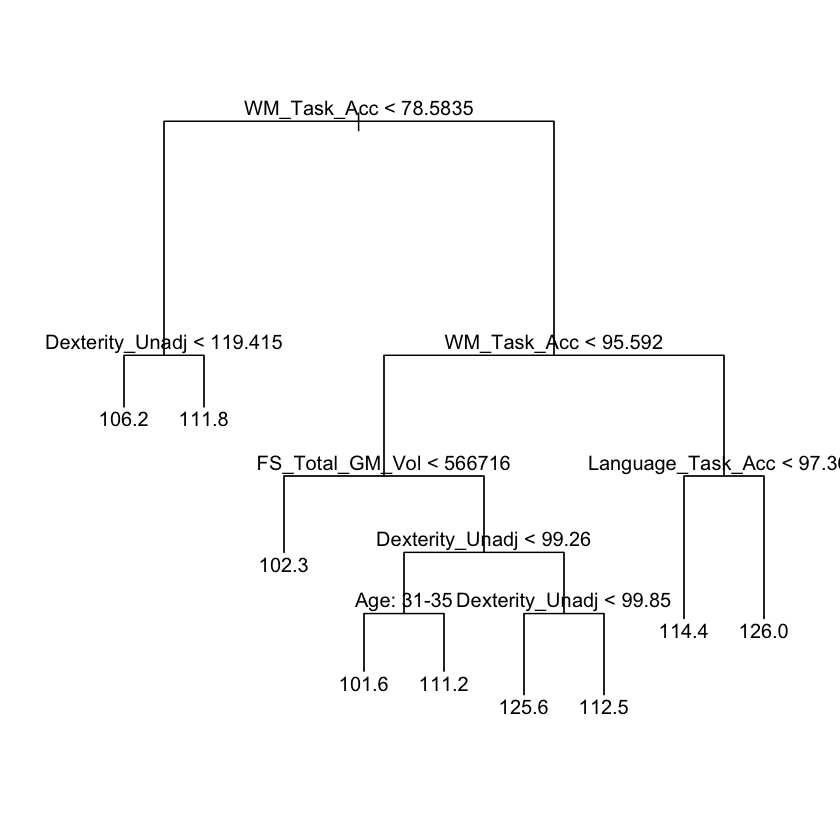

In [3]:
# Question 3b.
set.seed(1)
train = sample(1: nrow(d1), nrow(d1)/2)
tree.Flanker = tree(Flanker_Unadj ~ ., d1, subset = train)
summary(tree.Flanker)

plot(tree.Flanker)
text(tree.Flanker, pretty = 0)

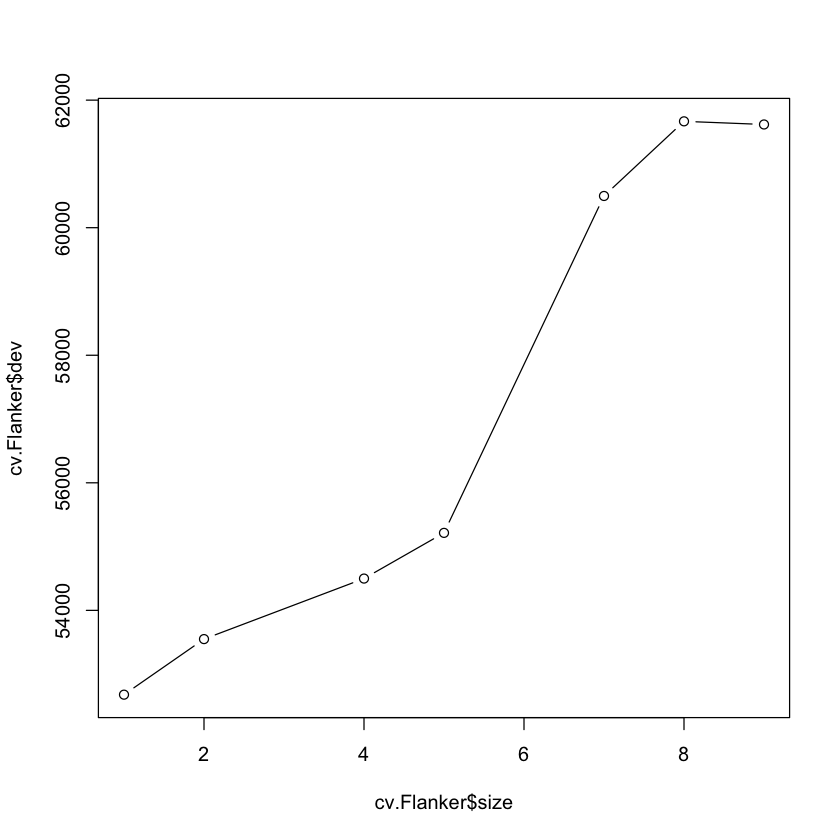

In [4]:
cv.Flanker = cv.tree(tree.Flanker) 
plot(cv.Flanker$size, cv.Flanker$dev, type = 'b')

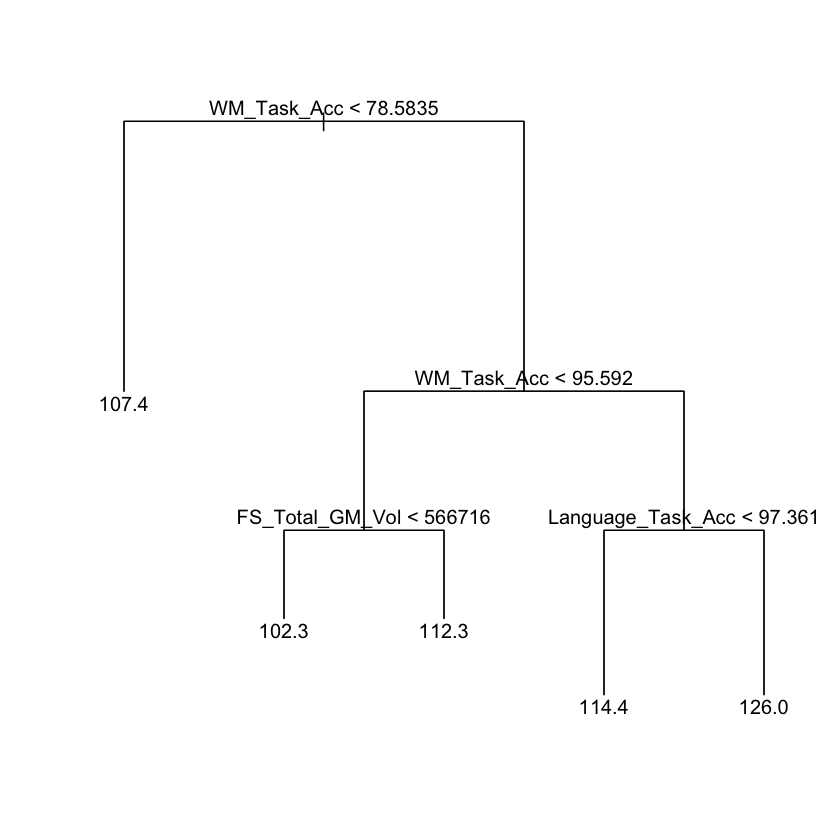

In [5]:
prune.Flanker = prune.tree(tree.Flanker, best = 5) #manually selecting a 5-node tree
plot(prune.Flanker)
text(prune.Flanker, pretty = 0)

[1] 107.4935

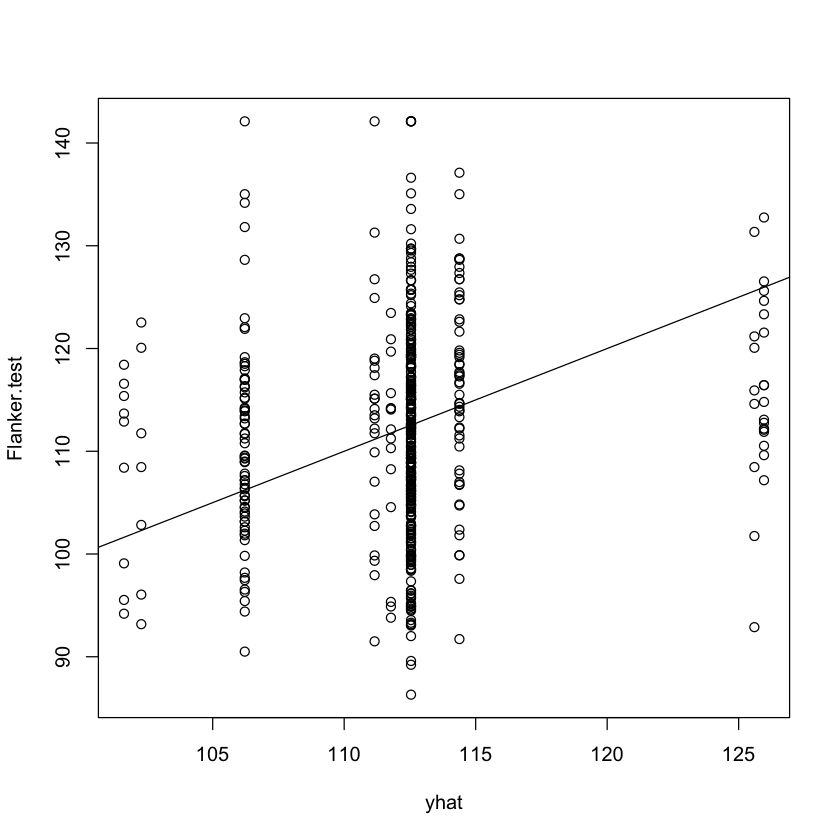

In [8]:
yhat = predict(tree.Flanker, newdata = d1[-train ,])
Flanker.test = d1[-train, "Flanker_Unadj"]
plot(yhat ,Flanker.test)
abline(0,1)
mean((yhat -Flanker.test)^2)

In other words, the test set MSE associated with the regression tree is 107.49. The square root of the MSE is therefore around 10.37, indicating that this model leads to test predictions that are within around 10.37 values of the true values of the unadjusted Flanker task scores.

In [9]:
# Question 4
tree.Gender <- tree(Gender ~ ., d1)
summary(tree.Gender)


Classification tree:
tree(formula = Gender ~ ., data = d1)
Variables actually used in tree construction:
[1] "FS_Total_GM_Vol" "Dexterity_Unadj"
Number of terminal nodes:  7 
Residual mean deviance:  0.7787 = 803.6 / 1032 
Misclassification error rate: 0.18 = 187 / 1039 

You can see that the training error rate was 18%. The residual mean deviance is also reported. A small deviance indicates a tree that fits the training data well. The residual mean deviance is the deviance divided by the number of observations ($n$) subtracted from the number of terminal nodes in the tree ($|T_0|$). In this case, the deviance is 803.6. There are 1039 observations for Gender, and 7 terminal nodes, so $(n-|T_0|)$ is 1032. 

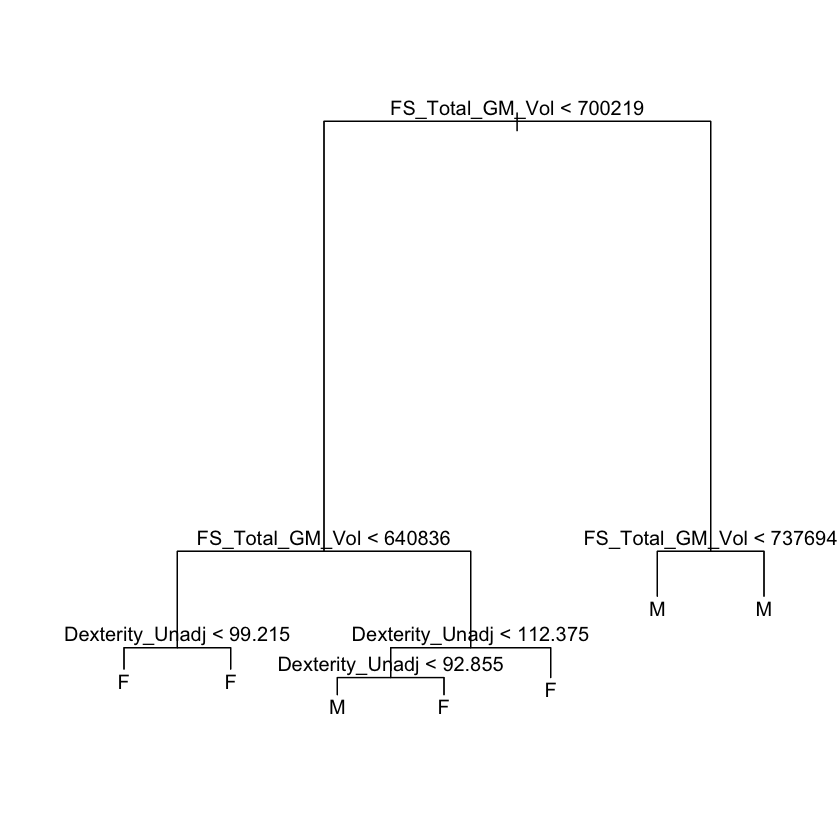

In [10]:
plot(tree.Gender)
text(tree.Gender, pretty = 0)

In [12]:
set.seed(2)
train = sample(1:nrow(d1), 500)
d1.test = d1[-train,]
Gender.test = d1$Gender[-train]
tree.Gender = tree(Gender~ ., d1, subset = train)
tree.pred = predict(tree.Gender, d1.test, type = "class")
table(tree.pred, Gender.test)
(248+165)/539

         Gender.test
tree.pred   F   M
        F 248  88
        M  38 165

[1] 0.7662338

In [13]:
set.seed(3)
cv.Gender = cv.tree(tree.Gender, FUN = prune.misclass)
names(cv.Gender)
cv.Gender

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 17  9  7  2  1

$dev
[1] 128 128 129 127 120 231

$k
[1]  -Inf   0.0   1.0   1.5   6.0 121.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

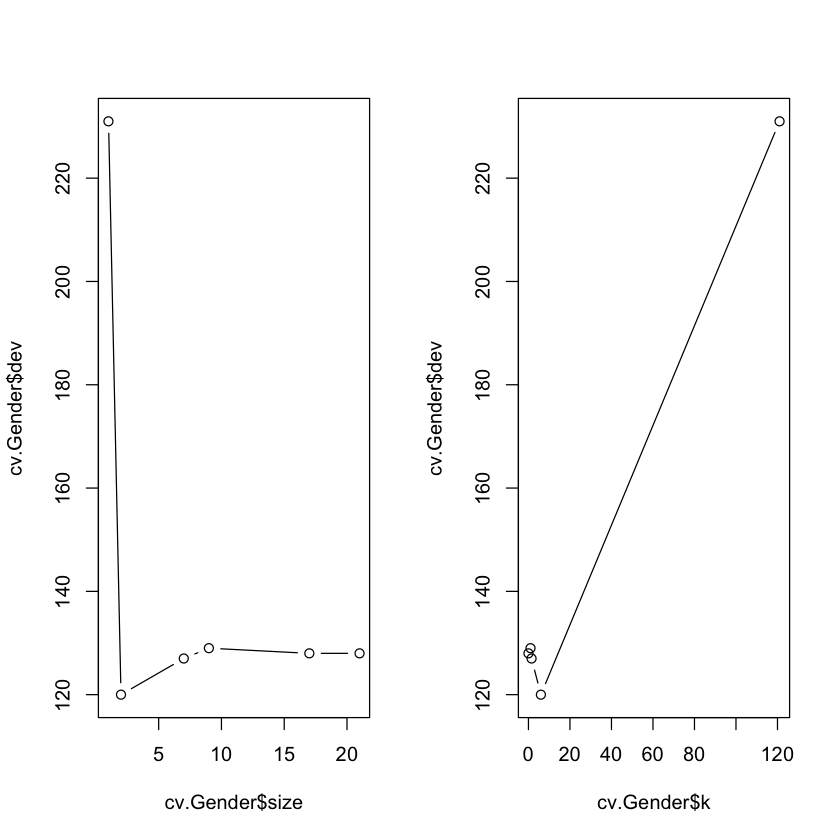

In [14]:
par(mfrow=c(1,2))
plot(cv.Gender$size, cv.Gender$dev, type="b")
plot(cv.Gender$k, cv.Gender$dev, type="b")

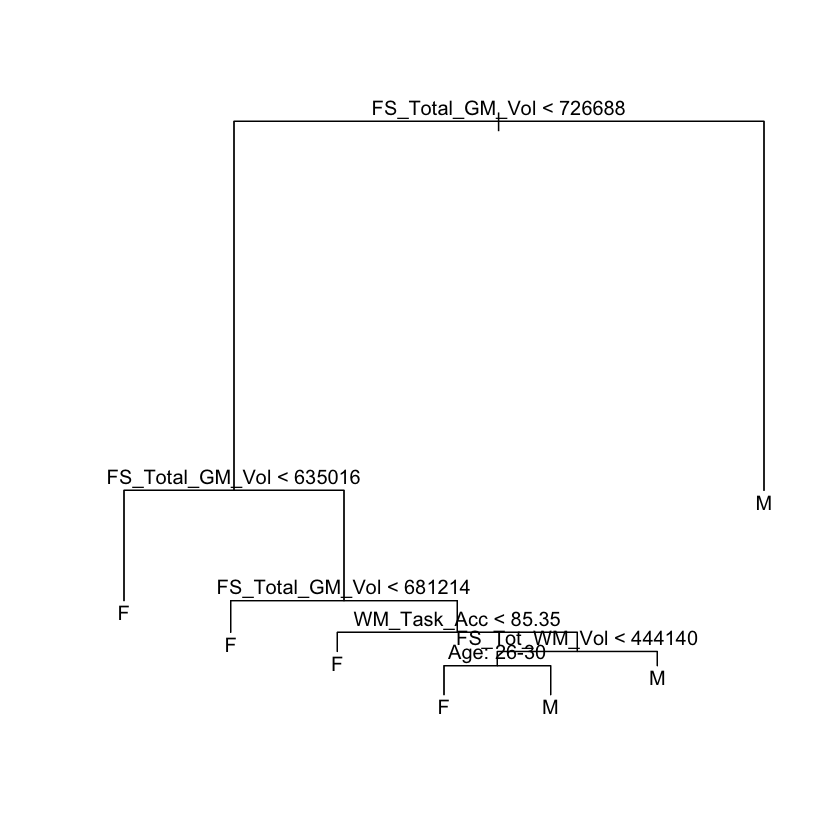

In [15]:
prune.Gender = prune.misclass(tree.Gender, best = 3)
plot(prune.Gender)
text(prune.Gender, pretty = 0)

In [16]:
tree.pred = predict(prune.Gender, d1.test, type = "class")
table(tree.pred, Gender.test)
(243+180)/539

         Gender.test
tree.pred   F   M
        F 243  73
        M  43 180

[1] 0.7847866

Now 78.5% of the test observations are correctly classified, so the classification accuracy has increased.

In [25]:
library(randomForest)
set.seed(1)
rf.Gender = randomForest(Gender ~ ., data = d1, subset = train, mtry = 3, importance = TRUE)
rf.Gender
(219+175)/500


Call:
 randomForest(formula = Gender ~ ., data = d1, mtry = 3, importance = TRUE,      subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 21.2%
Confusion matrix:
    F   M class.error
F 219  50   0.1858736
M  56 175   0.2424242

[1] 0.788

,F,M,MeanDecreaseAccuracy,MeanDecreaseGini
Subject,1.063647,-1.4125290,-0.2160211,13.630815
Age,3.771098,3.2803818,5.0661496,6.512444
Flanker_Unadj,2.242188,-0.1605174,1.5421747,15.497169
FS_Tot_WM_Vol,22.450072,20.4580144,29.5305959,47.999196
FS_Total_GM_Vol,37.333912,35.1957425,48.0548556,76.379045
WM_Task_Acc,3.218491,7.8798291,8.3091707,18.048895
ReadEng_Unadj,-2.569215,4.9075696,1.6304846,13.359988
Language_Task_Acc,3.949368,2.7933033,5.0386871,13.799270
Dexterity_Unadj,2.628082,3.5251307,4.3017024,17.300311
PosAffect_Unadj,-1.228499,2.0929808,0.6683092,11.033370


Now 78.5% of the test observations are correctly classified.

In [26]:
importance(rf.Gender)

,F,M,MeanDecreaseAccuracy,MeanDecreaseGini
Subject,1.063647,-1.4125290,-0.2160211,13.630815
Age,3.771098,3.2803818,5.0661496,6.512444
Flanker_Unadj,2.242188,-0.1605174,1.5421747,15.497169
FS_Tot_WM_Vol,22.450072,20.4580144,29.5305959,47.999196
FS_Total_GM_Vol,37.333912,35.1957425,48.0548556,76.379045
WM_Task_Acc,3.218491,7.8798291,8.3091707,18.048895
ReadEng_Unadj,-2.569215,4.9075696,1.6304846,13.359988
Language_Task_Acc,3.949368,2.7933033,5.0386871,13.799270
Dexterity_Unadj,2.628082,3.5251307,4.3017024,17.300311
PosAffect_Unadj,-1.228499,2.0929808,0.6683092,11.033370
